<a href="https://colab.research.google.com/github/Koushik-SCC/Physics/blob/main/SE_using_finite_difference_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modified SE:
$$ \psi'' + (\epsilon - V) \psi = 0 $$

Implementing Finite Difference Method, we get the following recurrence relation:
$$ \psi(x+dx) = 2\psi(x) - \psi(x-dx) - (\epsilon - V) \psi(x) (dx)^2 $$
which is
$$ \psi_{i+1} = 2\psi_i - \psi_{i-1} - ( \epsilon - V)\psi (dx)^2 $$
$$ = [2 - (\epsilon -V)(dx)^2]\psi_i - \psi_{i-1} $$

Here the solution is for Harmonic Oscillator. Therefore, the potential is V = $x^2$ (using proper modification)

Enter the lenght of the box:5
Enter the minimum Energy: 0
Enter the maximum Energy: 5
[0.9993746088130874, 2.9968714813107895, 4.99186144430999]
Energy 0th State: 0.9993746088130874
Probability of finding the particle in the interval[0,1] =  1.0
Energy 1th State: 2.9968714813107895
Probability of finding the particle in the interval[0,1] =  1.0
Energy 2th State: 4.99186144430999
Probability of finding the particle in the interval[0,1] =  1.0


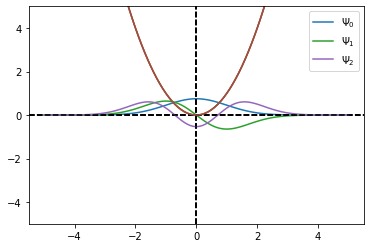

In [3]:
from scipy.optimize import bisect
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
L = eval(input('Enter the lenght of the box:'))
x, dx = np.linspace(-L,L,101,retstep = True)
E_min = eval(input('Enter the minimum Energy: '))
E_max = eval(input('Enter the maximum Energy: '))
def eigE(E):
  y = np.ones(len(x))
  y[0], y100 = 0.0,0.0
  for i in range(1,100):
    #V = x^2  #potential
    y[i+1] = (2 - (E - x[i]*x[i])*dx**2)*y[i] - y[i-1]
  return (y[-1] - y100)
Energies = np.arange(E_min,E_max,0.001)
Ef_zeros = [eigE(E) for E in Energies]

# Not necessary to plot the few following commads (upto 25)
'''
plt.plot(Energies,Ef_zeros)
plt.xlabel('Energy')
plt.ylabel('eigE')
plt.axhline(ls='--',color='k')
plt.show()
'''
# After knowing the Eigen Energies
def Psi(E,lbc):
  y = np.ones(len(x))
  y[0] = lbc
  for i in range(1,100):
    #V = 0  #potential
    y[i+1] = (2 - (E - x[i]*x[i])*dx**2)*y[i] - y[i-1]
  return y

E = E_min
Eig_E = []
while E < E_max:
	if eigE(E) * eigE(E+0.01) < 1:
		En = bisect(eigE,E,E+0.01)    # Although defined eigE(E), to execute this line I had to define the Psi(E,lbc) function
		Eig_E.append(En)
	E += 0.01
print(Eig_E)

for i in range(len(Eig_E)):
	y0 = 0.0 #lbc
	Ei = Eig_E[i]
	print('Energy '+str(i)+'th State:',Ei)
	psi = Psi(Ei,y0)
	N = 1/np.sqrt(simps(psi*psi,x))
	psi_normal = N*psi
	plt.plot(x,psi_normal,label = r'$\Psi_'+str(i)+'$')
	plt.legend()
	plt.axhline(ls = '--',color='k')
	plt.axvline(ls = '--',color='k')
	plt.plot(x,x**2) # plotting the potential
	plt.ylim(-5,5)
	print('Probability of finding the particle in the interval[0,1] = ',simps(psi_normal*psi_normal,x))
plt.show()